In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
import cv2
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
np.max(X_train[0]), np.min(X_train[0])

(255, 0)

In [6]:
X_train = X_train / 255.0
X_test = X_test/ 255.0

In [7]:
np.max(X_train[0]), np.min(X_train[0])

(1.0, 0.0)

In [8]:
num_classes = len(np.unique(y_test))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [10]:
x_train = np.array([cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC) for img in X_train])
x_test = np.array([cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC) for img in X_test])

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 224, 224, 3), (50000, 10), (10000, 224, 224, 3), (10000, 10))

In [12]:
x_train.shape[1:]

(224, 224, 3)

In [13]:
# input 224*224*3
image_input = Input(shape = (224,224,3))
x = Conv2D(96, kernel_size= (11,11), strides=4, padding='same',  activation = 'relu')(image_input)#55, 55, 96
x = MaxPooling2D((2,2))(x) #27, 27, 96
x = Conv2D(256, kernel_size= (5,5), strides=1, padding='SAME',  activation = 'relu')(x) #27, 27, 256
x = MaxPooling2D((2,2))(x) #13, 13, 256
x = Conv2D(192*2, kernel_size= (3,3), strides=1, padding='SAME',  activation = 'relu')(x) #13, 13, 384
x = Conv2D(192*2, kernel_size= (3,3), strides=1, padding='SAME',  activation = 'relu')(x) #13, 13, 384
x = MaxPooling2D((2,2))(x) #6, 6, 256
x = Conv2D(128*2, kernel_size= (3,3), strides=1, padding='SAME',  activation = 'relu')(x) #13, 13, 256
x = Flatten()(x)
x= Dense(4096, activation = 'relu')(x)
x= Dense(4096, activation = 'relu')(x)
output = Dense(1000, activation = 'softmax')(x)
model = Model(image_input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 384)       132748

In [17]:
def AlexNetModel():
    image_input = Input(shape = x_train.shape[1:])
    x = Conv2D(96, kernel_size= (11,11), strides=4, padding='same',  activation = 'relu')(image_input)#55, 55, 96
    x = MaxPooling2D((2,2))(x) #27, 27, 96
    x = Conv2D(256, kernel_size= (5,5), strides=1, padding='SAME',  activation = 'relu')(x) #27, 27, 256
    x = MaxPooling2D((2,2))(x) #13, 13, 256
    x = Conv2D(192*2, kernel_size= (3,3), strides=1, padding='SAME',  activation = 'relu')(x) #13, 13, 384
    x = Conv2D(192*2, kernel_size= (3,3), strides=1, padding='SAME',  activation = 'relu')(x) #13, 13, 384
    x = MaxPooling2D((2,2))(x) #6, 6, 256
    x = Conv2D(128*2, kernel_size= (3,3), strides=1, padding='SAME',  activation = 'relu')(x) #13, 13, 256
    x = Flatten()(x)
    x= Dense(4096, activation = 'relu')(x)
    x = Dropout(0.5)(x)
    x= Dense(4096, activation = 'relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation = 'softmax')(x)
    model = Model(image_input, output)
    
    return model

model = AlexNetModel()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 96)        34944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 384)       1327

In [18]:
sgd = SGD(momentum = 0.9, decay = 0.0005)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
result = model.fit(x_train,y_train, epochs=10, batch_size = 128,validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
391/391 [==============================] - 939s 2s/step - loss: 1.9257 - accuracy: 0.2914 - val_loss: 1.6327 - val_accuracy: 0.4045
Epoch 2/10
391/391 [==============================] - 940s 2s/step - loss: 1.4348 - accuracy: 0.4786 - val_loss: 1.2061 - val_accuracy: 0.5643
Epoch 3/10
391/391 [==============================] - 940s 2s/step - loss: 1.1785 - accuracy: 0.5766 - val_loss: 1.0526 - val_accuracy: 0.6293
Epoch 4/10
391/391 [==============================] - 940s 2s/step - loss: 1.0000 - accuracy: 0.6468 - val_loss: 0.9024 - val_accuracy: 0.6809
Epoch 5/10
391/391 [==============================] - 942s 2s/step - loss: 0.8345 - accuracy: 0.7063 - val_loss: 0.8214 - val_accuracy: 0.7130
Epoch 6/10
391/391 [==============================] - 942s 2s/step - loss: 0.7066 - accuracy: 0.7536 - val_loss: 0.7590 - val_accuracy: 0.7410
Epoch 7/10
391/391 [==============================] - 944s 2s/step - loss: 0.6046 - accuracy: 0.7891 - val_loss: 0.6968 - val_accuracy: 0.7598

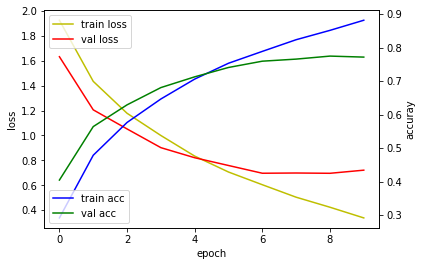

In [28]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(result.history['loss'], 'y', label='train loss')
loss_ax.plot(result.history['val_loss'], 'r', label='val loss')

acc_ax.plot(result.history['accuracy'], 'b', label='train acc')
acc_ax.plot(result.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()